In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

#---------------------------------------------------------------------------#
#User imports
import sys
sys.path.append('/Users/fardila/Documents/GitHub/HSC_vs_hydro/')
from functions import *

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Created TAP+ (v1.0) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


      +------------------------------------------------------------+
      |             Space Telescope Tables Package                 |
      |                  TABLES Version 3.18.3                     |
      |                                                            |
      |   Space Telescope Science Institute, Baltimore, Maryland   |
      |   Copyright (C) 2014 Association of Universities for       |
      |            Research in Astronomy, Inc.(AURA)               |
      |       See stsdas$copyright.stsdas for terms of use.        |
      |         For help, send e-mail to help@stsci.edu            |
      +------------------------------------------------------------+
tables/:
 fitsio/        tbplot/         tobsolete/      ttools/


      +------------------------------------------------------------+
      |       Space Telescope Science Data Analysis System         |
  

## check ellipticity

## check 1 to 1 with other resolution

In [2]:
tng_highres_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/galaxies_stellarmaps_tng75_11.2_highres.hdf5'
tng_quick_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/galaxies_stellarmaps_tng75_11.2.hdf5'
pixel_scale_highres, pixel_scale_quick = get_pixel_scale(tng_highres_file), get_pixel_scale(tng_quick_file)
print pixel_scale_highres, pixel_scale_quick

1.0 5.333333333333333


In [27]:
tng_isos_file_highres='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_highres.pkl'
tng_isos_file_quick='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_quick.pkl'
tng_isos_quick = open_pkl(tng_isos_file_quick)
tng_isos_highres = open_pkl(tng_isos_file_highres)

## plot 5 random profiles in both resolutions

In [10]:
np.random.seed(0)
N=5
random_indices = np.random.choice(range(len(tng_isos_highres)),N)
print random_indices

[172  47 117 192  67]


/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


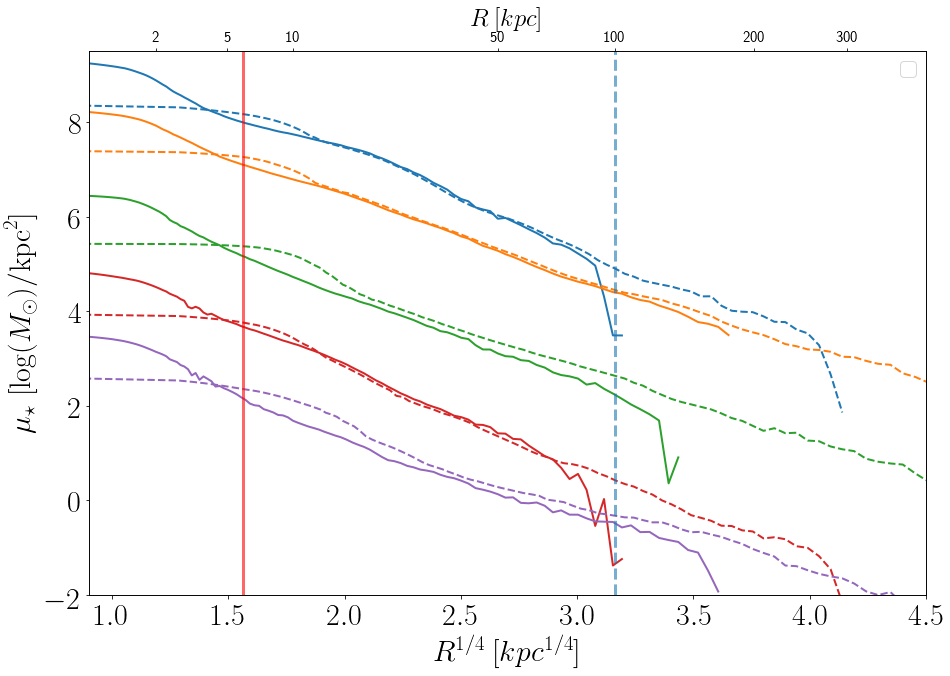

In [5]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

for i,n in zip(random_indices,range(N)):
    
    iso_highres = tng_isos_highres[i]
    iso_quick = tng_isos_quick[i]
    
    

    p = ax1.plot((iso_highres['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=1, linestyle='-')

    ax1.plot((iso_quick['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_quick['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle='--')




# no show lines for legend
# ax1.plot([], linewidth=2, alpha=1, label='HighRes: '+str(pixel_scale_highres)+' kpc/pixel', zorder=1, c='b') 
# ax1.plot([], linewidth=2, alpha=1, label='Quick: '+str(pixel_scale_quick)+' kpc/pixel', zorder=1, c='r') 


######################################################################################################################
# plot details
######################################################################################################################
# X-Y limits
ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(-2, 9.5)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

## zoom into middle section 

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


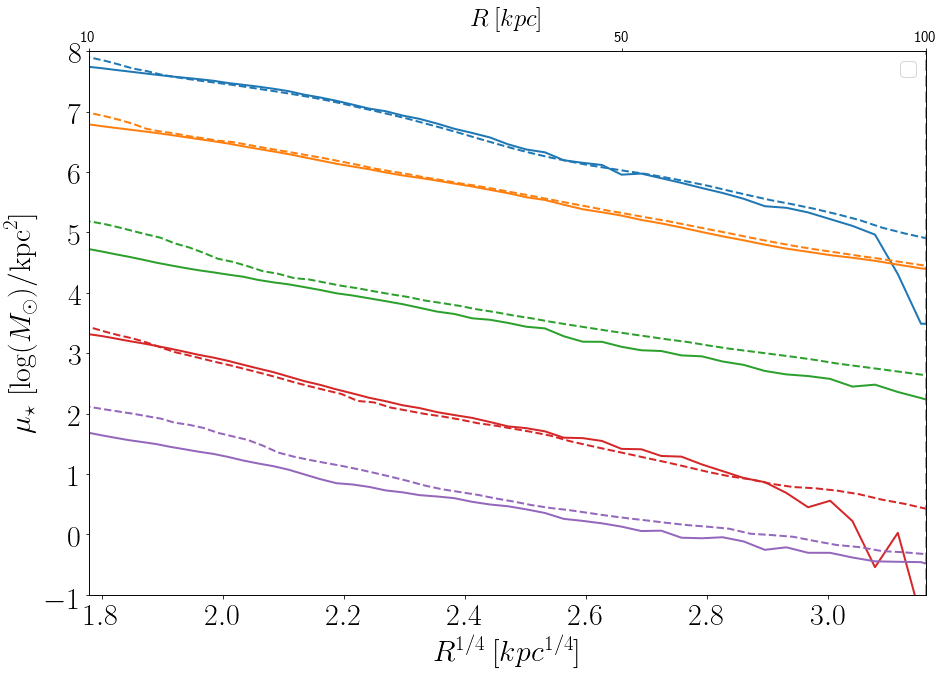

In [6]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

for i,n in zip(random_indices,range(N)):
    
    iso_highres = tng_isos_highres[i]
    iso_quick = tng_isos_quick[i]
    
    

    p = ax1.plot((iso_highres['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=1, linestyle='-')

    ax1.plot((iso_quick['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_quick['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle='--')





# no show lines for legend
# ax1.plot([], linewidth=2, alpha=1, label='HighRes: '+str(pixel_scale_highres)+' kpc/pixel', zorder=1, c='b') 
# ax1.plot([], linewidth=2, alpha=1, label='Quick: '+str(pixel_scale_quick)+' kpc/pixel', zorder=1, c='r') 


######################################################################################################################
# plot details
######################################################################################################################
# X-Y limits
ax1.set_xlim(10**0.25, 100**0.25)
ax1.set_ylim(-1, 8)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([10**0.25, 50**0.25, 100**0.25])
ax1_twin.xaxis.set_ticklabels([10, 50, 100])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

## zoom into high radius

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


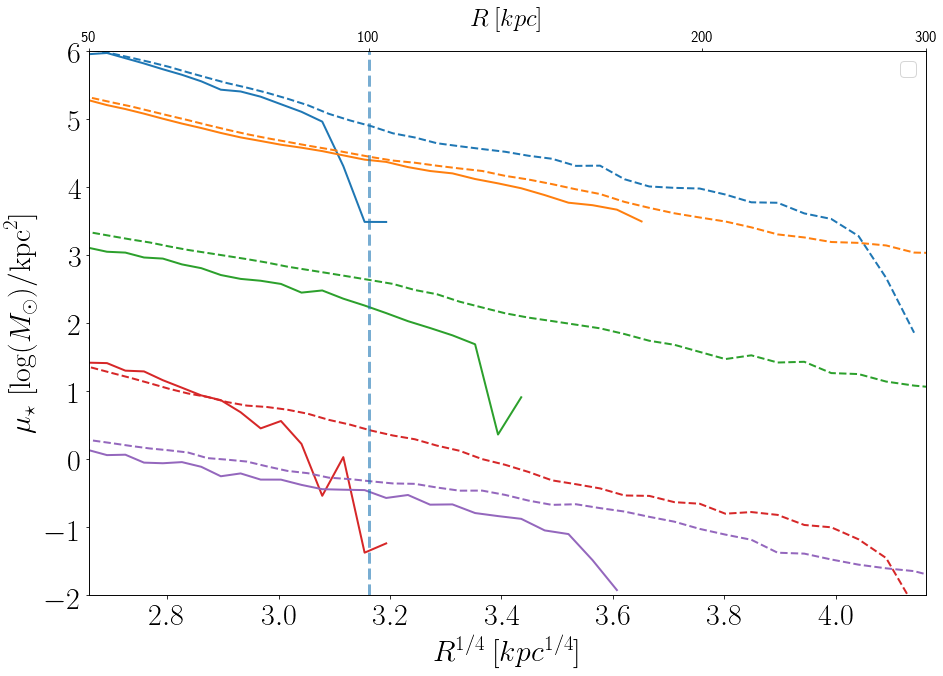

In [7]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

for i,n in zip(random_indices,range(N)):
    
    iso_highres = tng_isos_highres[i]
    iso_quick = tng_isos_quick[i]
    
    

    p = ax1.plot((iso_highres['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=1, linestyle='-')

    ax1.plot((iso_quick['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_quick['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle='--')




# no show lines for legend
# ax1.plot([], linewidth=2, alpha=1, label='HighRes: '+str(pixel_scale_highres)+' kpc/pixel', zorder=1, c='b') 
# ax1.plot([], linewidth=2, alpha=1, label='Quick: '+str(pixel_scale_quick)+' kpc/pixel', zorder=1, c='r') 


######################################################################################################################
# plot details
######################################################################################################################
# X-Y limits
ax1.set_xlim(50**0.25, 300**0.25)
ax1.set_ylim(-2, 6)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

# images of galaxies

### save files for Song 

In [76]:
lowres172, _, _, _ = get_mass_maps(tng_quick_file, gal_n=172)
highres172, _, _, _ = get_mass_maps(tng_highres_file, gal_n=172)

np.save('/Users/fardila/Downloads/TNG_highres_172.npy', highres172)
np.save('/Users/fardila/Downloads/TNG_lowres_172.npy', lowres172)

In [58]:
def reduce_map(map, pixel_scale, final_size_in_kpc):
    current_size_in_pixels = len(map)
    final_size_in_pixels = float(final_size_in_kpc) / pixel_scale
    
    diff = int((current_size_in_pixels - final_size_in_pixels)/2.)
    
    if diff==0:
        return map
    else:
        return map[diff:-diff,diff:-diff]

In [80]:
def galaxy_image(sim_file, sim_name, pixel_scale, ax, gal_n=0):
    #central pixels
    x0=150.
    y0=150.

    # Load maps
    mass_map_cen, mass_map_cen_icl, pixel_scale, m_cat = get_mass_maps(sim_file, gal_n=gal_n)

    #postage mass
    m_post = np.log10(np.sum(mass_map_cen))
    m_post_icl = np.log10(np.sum(mass_map_cen_icl))


    #ouput maps
    maps_location='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/'

    file_name=sim_name+'_'+str(gal_n)+'_xy'
    fits_prefix = maps_location + file_name
#     save_to_fits(mass_map_cen, fits_prefix + '_cen.fits')
    # save_to_fits(img_cen_sat, fits_prefix + '_cen_sat.fits')
    # save_to_fits(img_cen_icl, fits_prefix + '_cen_icl.fits')
    # save_to_fits(img_all, fits_prefix + '_all.fits')

    
    suffix='_cen'

    ###########################################################################
    #reduce map size to make them comparable
    data = np.ascontiguousarray(reduce_map(mass_map_cen, pixel_scale, 300))
#     data = mass_map_cen
    x0=len(data/2.)
    y0=x0
    
    #get background
    bkg = sep.Background(data, bw=10, bh=10, fw=5, fh=5)
    bkg_subtraced_data = data - bkg

    thresh = 50 * bkg.globalrms
    objects = sep.extract(bkg_subtraced_data, thresh, minarea = 100,
                          deblend_nthresh=24, deblend_cont=0.1)

    #find object closest to image center
    obj = find_closest(objects, x0=x0, y0=y0)

    #ellipse parameters
    theta = obj['theta']
    q = obj['b']/ obj['a']
    print 'q: ', q, ', theta: ', theta
    print 'ell: ', 1-q, ', pa: ', theta* 180. / np.pi

    a_10, a_30, a_100 = (10. / pixel_scale), (30. / pixel_scale), (100. / pixel_scale)
    b_10, b_30, b_100 =  a_10 * q, a_30 * q, a_100 * q


    # plot background-subtracted image
    m, s = np.mean(data), np.std(data)
#     fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(data, interpolation='nearest', cmap=plt.get_cmap('viridis'),
                   vmin=m/100., vmax=m+s, origin='lower')

    # plot an ellipse for each object
    e_30 = Ellipse(xy=(obj['x'], obj['y']),
                 width=a_30*2,
                 height=b_30*2,
                 angle=theta * 180. / np.pi)
    e_30.set_facecolor('none')
    e_30.set_edgecolor('red')
    ax.add_artist(e_30)

    e_100 = Ellipse(xy=(obj['x'], obj['y']),
                 width=a_100*2,
                 height=b_100*2,
                 angle=theta * 180. / np.pi)
    e_100.set_facecolor('none')
    e_100.set_edgecolor('red')
    ax.add_artist(e_100)
    
#     #change limits, so both display 150kpc
#     img_size=300/pixel_scale
#     plt.xlim([x0-img_size/2., x0+img_size/2.])
#     plt.ylim([y0-img_size/2., y0+img_size/2.])
    
    #scale bar
    img_size = len(data)
    scale_bar_length = 50 #kpc
    scale_bar_y = (img_size * 0.15)
    scale_bar_x_0 = (img_size * 0.9 - (scale_bar_length / pixel_scale))
    scale_bar_x_1 = (img_size * 0.9)
    ax.plot([scale_bar_x_0, scale_bar_x_1], [scale_bar_y, scale_bar_y], linewidth=3,
            c='w', alpha=1.0)
    #text
    scale_bar_text_x = (scale_bar_x_0 + scale_bar_x_1) / 2
    scale_bar_text_y = (scale_bar_y - img_size*0.05)
    scale_bar_text = r'$%d\ \mathrm{kpc}$' % int(scale_bar_length)
    ax.text(scale_bar_text_x, scale_bar_text_y, scale_bar_text, fontsize=20, 
            horizontalalignment='center', color='w')
    
    #color bar
#     ax_cbar = inset_axes(ax1, width=color_bar_width, height=color_bar_height, loc=color_bar_loc)
#     cbar = plt.colorbar(show, ax=ax, cax=ax_cbar, orientation='horizontal')
    cbar = plt.colorbar(im, ax=ax)

#         cbar.ax.xaxis.set_tick_params(color=color_bar_color)
#         cbar.ax.yaxis.set_tick_params(color=color_bar_color)
#         cbar.outline.set_edgecolor(color_bar_color)
#         plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'),
#                  color=color_bar_color, fontsize=color_bar_fontsize)
#         plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'),
#                  color=color_bar_color, fontsize=color_bar_fontsize)

#     plt.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/ellipses/quick_800/'+file_name)
#     plt.clf()


#     plt.show()


q:  0.6364325611233148 , theta:  -1.526005744934082
ell:  0.3635674388766852 , pa:  -87.4336886974401
q:  0.7565235847733708 , theta:  -1.2775568962097168
ell:  0.24347641522662922 , pa:  -73.19861824064974


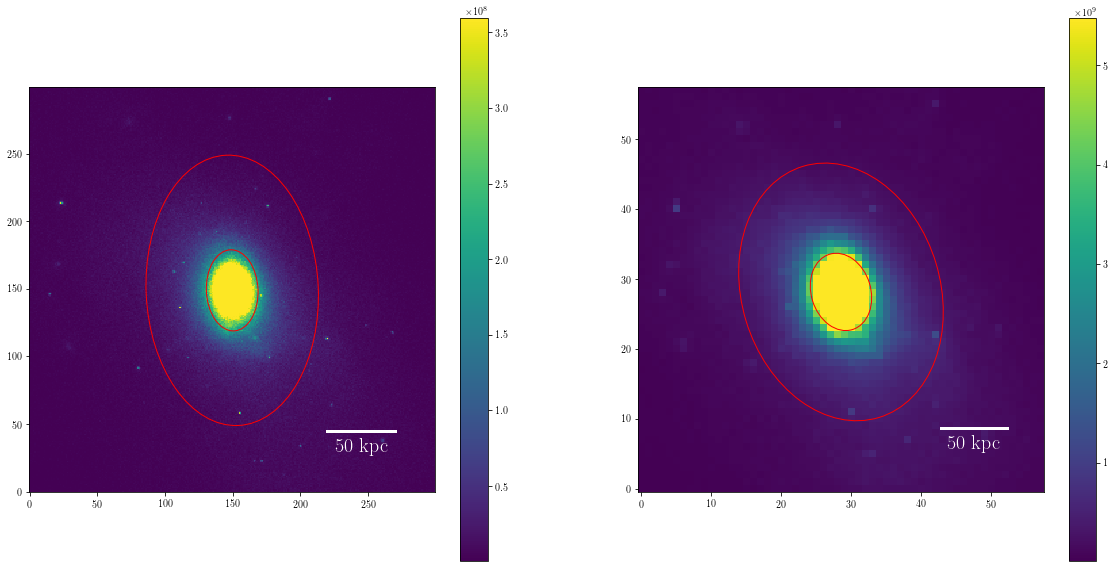

In [81]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
galaxy_image(tng_highres_file, 'TNG_highres', pixel_scale_highres, ax[0], gal_n=0)
galaxy_image(tng_quick_file, 'TNG_quick', pixel_scale_quick, ax[1], gal_n=0)

GALAXY 172
q:  0.7096989837905382 , theta:  -0.9677717089653015
ell:  0.2903010162094618 , pa:  -55.44923445587479
q:  0.7777205899567106 , theta:  -0.7974396347999573
ell:  0.22227941004328944 , pa:  -45.68992549049124
GALAXY 47
q:  0.7789578808377112 , theta:  0.6773955225944519
ell:  0.22104211916228877 , pa:  38.81190450572089
q:  0.8186910182146613 , theta:  0.7043361663818359
ell:  0.18130898178533872 , pa:  40.35548969210334
GALAXY 117
q:  0.6607481941561479 , theta:  0.7324838042259216
ell:  0.33925180584385206 , pa:  41.96823054383216
q:  0.5604459596719551 , theta:  0.6209591627120972
ell:  0.4395540403280449 , pa:  35.57833927338053
GALAXY 192
q:  0.6645956987379449 , theta:  1.565239667892456
ell:  0.3354043012620551 , pa:  89.68162689669636
q:  0.7960757071460959 , theta:  -1.429808259010315
ell:  0.20392429285390412 , pa:  -81.9219787542391
GALAXY 67
q:  0.6569473570904412 , theta:  -0.14955075085163116
ell:  0.34305264290955884 , pa:  -8.568626846810968
q:  0.55561552082

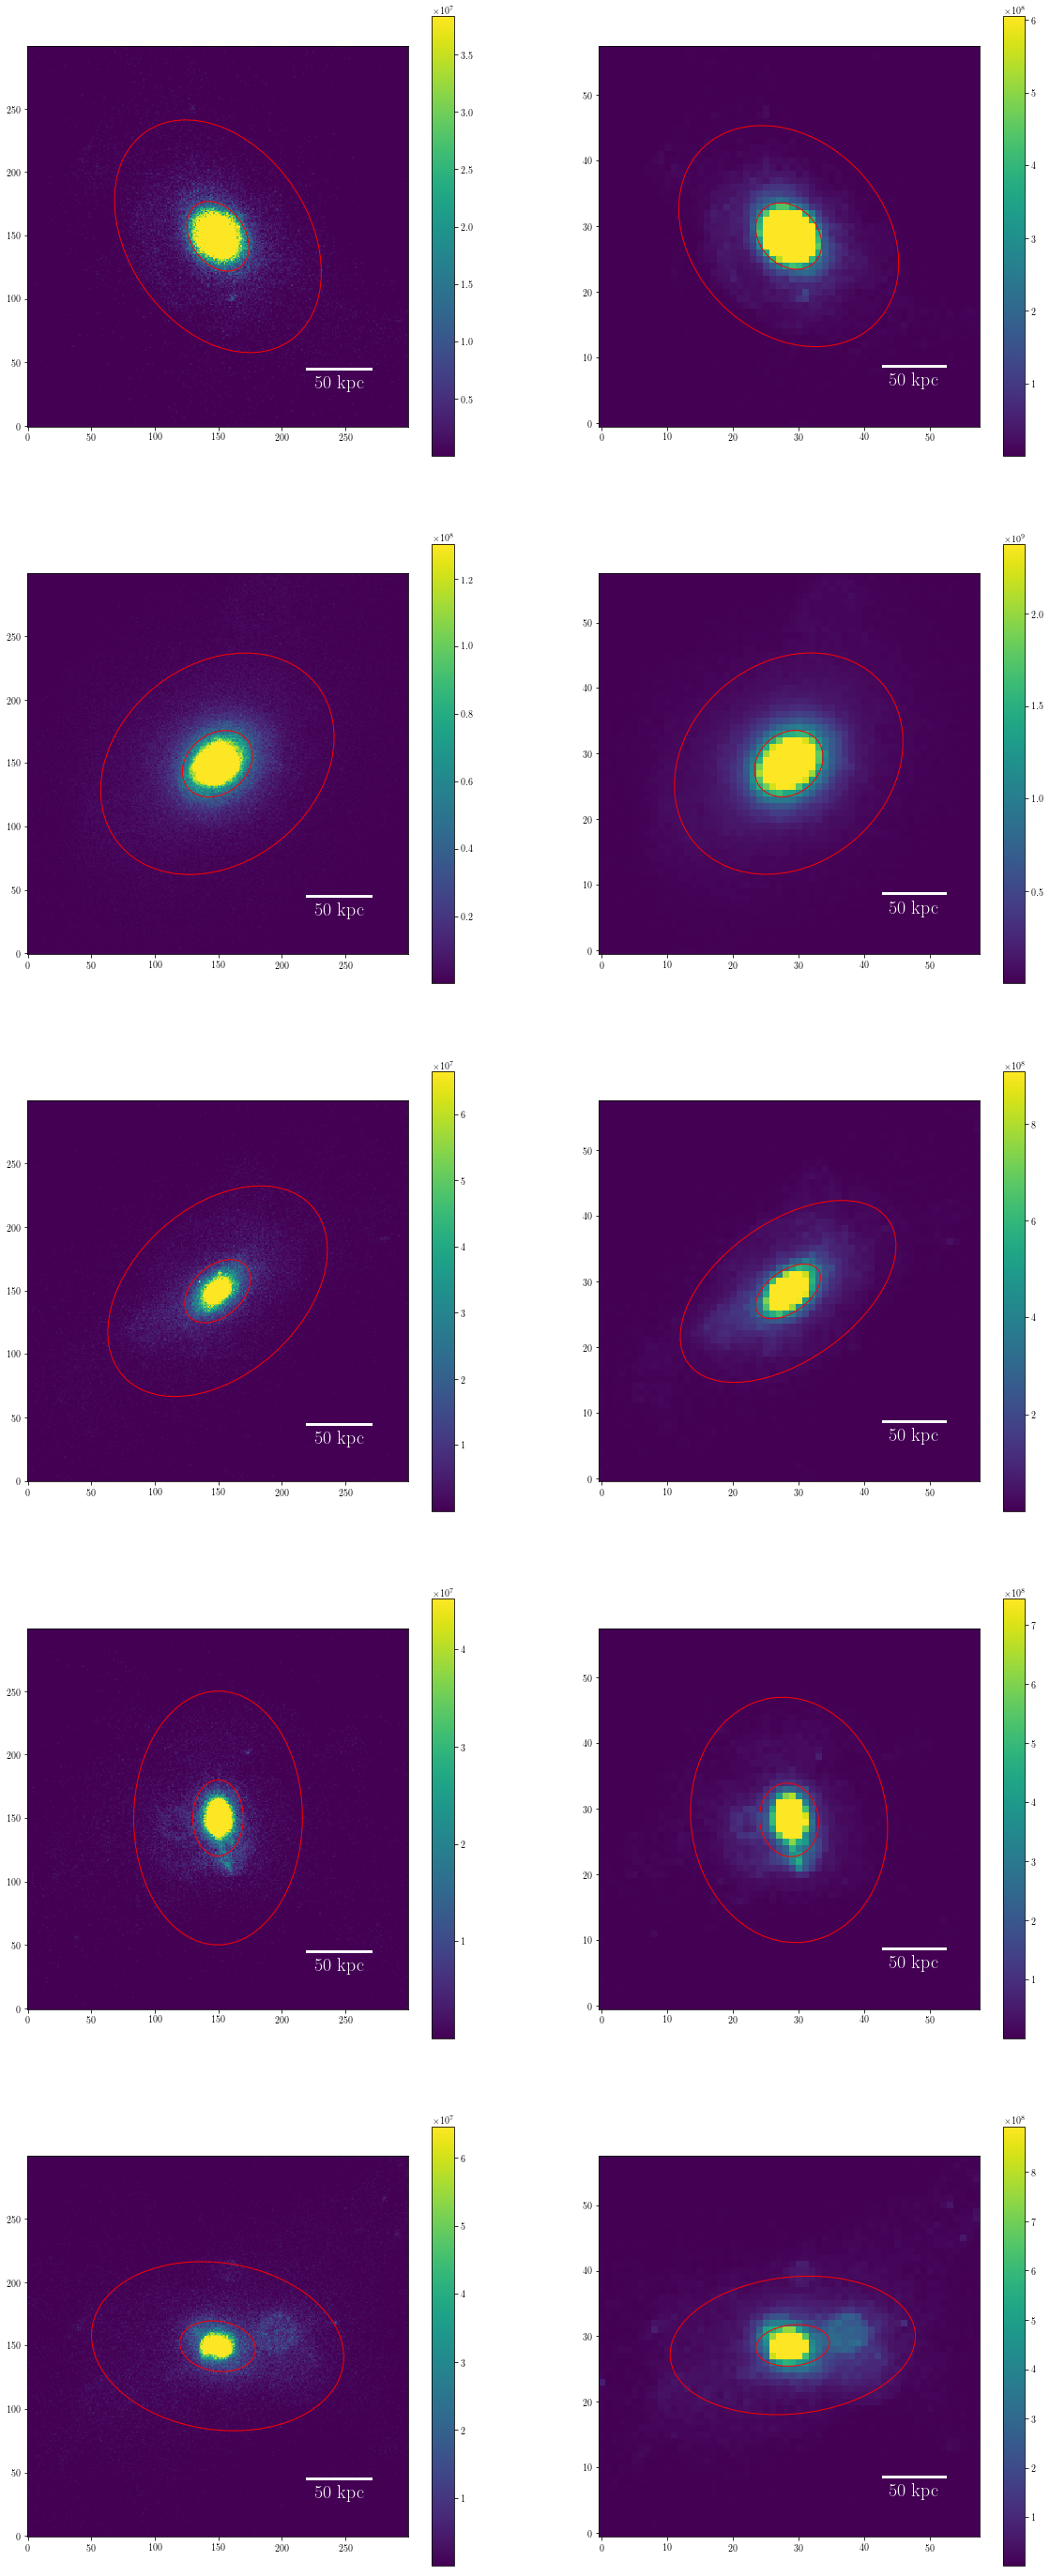

In [82]:
fig, axes = plt.subplots(figsize=(10* 2, 10* len(random_indices)), nrows=len(random_indices), ncols=2)


for ax, i in zip(axes, random_indices):
    print 'GALAXY ' + str(i)
    galaxy_image(tng_highres_file, 'TNG_highres', pixel_scale_highres, ax[0], gal_n=i)
    galaxy_image(tng_quick_file, 'TNG_quick', pixel_scale_quick, ax[1], gal_n=i)
    
plt.show()
    

# Try changes to make profiles more similar 

@shuang: Yes, if you have the b/a and PA from the low resolution images, you can directly apply them to the high-res image using `step3`.  This will make sure we are comparing the profiles along the same major axis.
It would be easier for me to say for sure if I can work on the image.  Few things that can be related:
1.  sigma clipping is too aggressive at larger radius?  (try reducing the number of clipping, or use less aggressive clipping).
2.  median no longer works well?  (try mean instead) 
3.  another thing is the high-order Fourier modes.  it could go crazy at low S/N region can make the actual isophotal shape deviate from symmetric ellipse.  Can check the `a3`, `a4`, `b3`, `b4`.

## get ellipticity from quick and apply to highres

Note: ellipticty will vary from smaller map (reduced in size to match highres scale) to total map

In [ ]:
def get_masses_highres(sim_file, sim_name, gal_n=0):

    # Load maps
    mass_map_cen, mass_map_cen_icl, pixel_scale, m_cat = get_mass_maps(sim_file, gal_n=gal_n)

    #postage mass
    m_post = np.log10(np.sum(mass_map_cen))
    m_post_icl = np.log10(np.sum(mass_map_cen_icl))


    #ouput maps
    maps_location='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/highres/'

    file_name=sim_name+'_'+str(gal_n)+'_xy'
    fits_prefix = maps_location + file_name
    save_to_fits(mass_map_cen, fits_prefix + '_cen.fits')
    # save_to_fits(img_cen_sat, fits_prefix + '_cen_sat.fits')
    # save_to_fits(img_cen_icl, fits_prefix + '_cen_icl.fits')
    # save_to_fits(img_all, fits_prefix + '_all.fits')

    data=mass_map_cen
    suffix='_cen'

    ###########################################################################
    #get ellipse information from iso file of quick
    iso_quick = load_pkl('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/TNG_%d_xy_cen_ellip_3.pkl'%i)
    q = 1- iso_quick['ell'][-1]
    theta = iso_quick['pa'][-1]* np.pi /180. 

    #central pixels
    x0=len(data)/2.
    y0=len(data)/2.

    a_10, a_30, a_100 = (10. / pixel_scale), (30. / pixel_scale), (100. / pixel_scale)
    b_10, b_30, b_100 =  a_10 * q, a_30 * q, a_100 * q



    # plot background-subtracted image
    m, s = np.mean(data), np.std(data)
    fig, ax = plt.subplots()
    im = ax.imshow(data, interpolation='nearest', cmap=plt.get_cmap('viridis'),
                   vmin=m-s, vmax=m+s, origin='lower')

    # plot an ellipse for each object
    e_30 = Ellipse(xy=(x0, y0),
                 width=a_30,
                 height=b_30,
                 angle=theta * 180. / np.pi)
    e_30.set_facecolor('none')
    e_30.set_edgecolor('red')
    ax.add_artist(e_30)

    e_100 = Ellipse(xy=(x0, y0),
                 width=a_100,
                 height=b_100,
                 angle=theta * 180. / np.pi)
    e_100.set_facecolor('none')
    e_100.set_edgecolor('red')
    ax.add_artist(e_100)


    plt.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/ellipses/highres/'+file_name)
    plt.clf()

    ###########################################################################
    #2D masses
    flux_10, fluxerr_10, flag_10 = sep.sum_ellipse(data, x0, y0,
                                                   a_10, b_10, theta)
    flux_30, fluxerr_30, flag_30 = sep.sum_ellipse(data, x0, y0,
                                                   a_30, b_30, theta)
    flux_100, fluxerr_100, flag_100 = sep.sum_ellipse(data, x0, y0,
                                                      a_100, b_100, theta)

    ###########################################################################
    #1D masses from galSBP
    try:
        iso, iso_bin = galSBP.galSBP(maps_location+file_name+suffix+'.fits',
                                         galX=x0,
                                         galY=y0,
                                         galQ=q,
                                         galPA=theta* 180. / np.pi,
                                         maxSma=250,
                                         iniSma=50.0,
                                         stage=3,
                                         intMode='median',
                                         ellipStep=0.05,
                                         pix=pixel_scale,
                                         zpPhoto=0.0,
                                         isophote=x_isophote,
                                         xttools=x_ttools,
                                         recenter=True,
                                         savePng=False,
                                         verbose=True)


        ###########################################################################
        iso['sma_kpc'] = iso['sma'] * pixel_scale
        iso['intens_kpc']=iso['intens'] / (pixel_scale**2)

        m_1d_10, m_1d_30, m_1d_100 = oneD_mass(iso, 10.), \
                                    oneD_mass(iso, 30.), \
                                    oneD_mass(iso, 100.)

        #integrated mass from extrapolation
        extrap_mass = extrapolated_1D_mass(iso, 800)

    except:
        iso,m_1d_10, m_1d_30, m_1d_100, extrap_mass  = -99.99, -99.99, -99.99, -99.99, -99.99


    m_2d_10, m_2d_30, m_2d_100 = np.log10(flux_10), \
                                np.log10(flux_30), \
                                np.log10(flux_100)


    masses = [m_cat, m_post, m_post_icl, m_1d_10, m_1d_30, m_1d_100, m_2d_10,
            m_2d_30, m_2d_100, extrap_mass]

    return iso, masses


In [16]:
random_isos_highres = []
random_isos_highres_diffE = [] #compare to isos with different elipticity
random_isos_quick = []

for i in random_indices:
    
        iso_quick = tng_isos_quick[i]
        iso_highres_diffE = tng_isos_highres[i]
        iso_highres, _ = get_masses_highres(tng_highres_file, 'TNG_highres', gal_n=i)
        
        random_isos_quick.append(iso_quick)
        random_isos_highres_diffE.append(iso_highres_diffE)
        random_isos_highres.append(iso_highres)

----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/highres/TNG_highres_172_xy_cen.fits
###      Input Image   : temp_Q0OIO.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/highres/TNG_highres

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


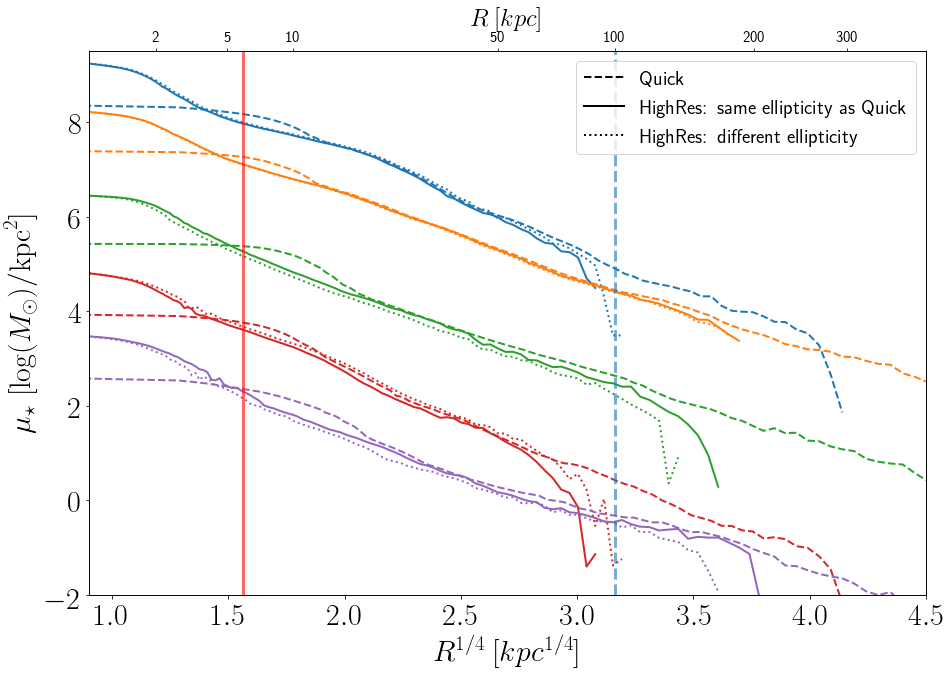

In [34]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

for n in range(N):
    
    iso_highres = random_isos_highres[n]
    iso_highres_diffE = random_isos_highres_diffE[n]
    iso_quick = random_isos_quick[n]
    
    

    p = ax1.plot((iso_highres['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=1, linestyle='-')

    ax1.plot((iso_quick['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_quick['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle='--')
    ax1.plot((iso_highres_diffE['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres_diffE['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle=':')




# no show lines for legend
ax1.plot([], linewidth=2, alpha=1, linestyle='--', label='Quick', zorder=1, c='k') 
ax1.plot([], linewidth=2, alpha=1, label='HighRes: same ellipticity as Quick', zorder=1, c='k') 
ax1.plot([], linewidth=2, alpha=1, linestyle=':', label='HighRes: different ellipticity', zorder=1, c='k') 


######################################################################################################################
# plot details
######################################################################################################################
# X-Y limits
ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(-2, 9.5)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

## change sigma clipping


In [49]:
def get_masses_highres(sim_file, sim_name, gal_n=0):

    # Load maps
    mass_map_cen, mass_map_cen_icl, pixel_scale, m_cat = get_mass_maps(sim_file, gal_n=gal_n)

    #postage mass
    m_post = np.log10(np.sum(mass_map_cen))
    m_post_icl = np.log10(np.sum(mass_map_cen_icl))


    #ouput maps
    maps_location='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/highres/'

    file_name=sim_name+'_'+str(gal_n)+'_xy'
    fits_prefix = maps_location + file_name
    save_to_fits(mass_map_cen, fits_prefix + '_cen.fits')
    # save_to_fits(img_cen_sat, fits_prefix + '_cen_sat.fits')
    # save_to_fits(img_cen_icl, fits_prefix + '_cen_icl.fits')
    # save_to_fits(img_all, fits_prefix + '_all.fits')

    data=mass_map_cen
    suffix='_cen'

    ###########################################################################
    #get ellipse information from iso file of quick
    iso_quick = load_pkl('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/TNG_%d_xy_cen_ellip_3.pkl'%i)
    q = 1- iso_quick['ell'][-1]
    theta = iso_quick['pa'][-1]* np.pi /180. 

    #central pixels
    x0=len(data)/2.
    y0=len(data)/2.

    a_10, a_30, a_100 = (10. / pixel_scale), (30. / pixel_scale), (100. / pixel_scale)
    b_10, b_30, b_100 =  a_10 * q, a_30 * q, a_100 * q



    # plot background-subtracted image
    m, s = np.mean(data), np.std(data)
    fig, ax = plt.subplots()
    im = ax.imshow(data, interpolation='nearest', cmap=plt.get_cmap('viridis'),
                   vmin=m-s, vmax=m+s, origin='lower')

    # plot an ellipse for each object
    e_30 = Ellipse(xy=(x0, y0),
                 width=a_30,
                 height=b_30,
                 angle=theta * 180. / np.pi)
    e_30.set_facecolor('none')
    e_30.set_edgecolor('red')
    ax.add_artist(e_30)

    e_100 = Ellipse(xy=(x0, y0),
                 width=a_100,
                 height=b_100,
                 angle=theta * 180. / np.pi)
    e_100.set_facecolor('none')
    e_100.set_edgecolor('red')
    ax.add_artist(e_100)


    plt.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/ellipses/highres/'+file_name)
    plt.clf()

    ###########################################################################
    #2D masses
    flux_10, fluxerr_10, flag_10 = sep.sum_ellipse(data, x0, y0,
                                                   a_10, b_10, theta)
    flux_30, fluxerr_30, flag_30 = sep.sum_ellipse(data, x0, y0,
                                                   a_30, b_30, theta)
    flux_100, fluxerr_100, flag_100 = sep.sum_ellipse(data, x0, y0,
                                                      a_100, b_100, theta)

    ###########################################################################
    #1D masses from galSBP
#     try:
    iso, iso_bin = galSBP.galSBP(maps_location+file_name+suffix+'.fits',
                                     galX=x0,
                                     galY=y0,
                                     galQ=q,
                                     galPA=theta* 180. / np.pi,
                                     maxSma=250,
                                     iniSma=50.0,
                                     stage=3,
                                     intMode='median',
                                     ellipStep=0.05,
                                     pix=pixel_scale,
                                     zpPhoto=0.0,
                                     isophote=x_isophote,
                                     xttools=x_ttools,
                                     recenter=True,
                                     savePng=False,
                                     verbose=True,
                                     uppClip=10.0,
                                     lowClip=100.0,
                                     nClip=0)


    ###########################################################################
    iso['sma_kpc'] = iso['sma'] * pixel_scale
    iso['intens_kpc']=iso['intens'] / (pixel_scale**2)

    m_1d_10, m_1d_30, m_1d_100 = oneD_mass(iso, 10.), \
                                oneD_mass(iso, 30.), \
                                oneD_mass(iso, 100.)

    #integrated mass from extrapolation
    extrap_mass = extrapolated_1D_mass(iso, 800)

#     except:
#         iso,m_1d_10, m_1d_30, m_1d_100, extrap_mass  = -99.99, -99.99, -99.99, -99.99, -99.99


    m_2d_10, m_2d_30, m_2d_100 = np.log10(flux_10), \
                                np.log10(flux_30), \
                                np.log10(flux_100)


    masses = [m_cat, m_post, m_post_icl, m_1d_10, m_1d_30, m_1d_100, m_2d_10,
            m_2d_30, m_2d_100, extrap_mass]

    return iso, masses


In [50]:
random_isos_highres_diffSigClip = [] #compare to isos with different elipticity

for i in random_indices:
        
        iso_highres_diffSigClip, _ = get_masses_highres(tng_highres_file, 'TNG_highres',
                                                        gal_n=i)
    
        random_isos_highres_diffSigClip.append(iso_highres_diffSigClip)

----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/highres/TNG_highres_172_xy_cen.fits
###      Input Image   : temp_12XNU.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/highres/TNG_highres

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


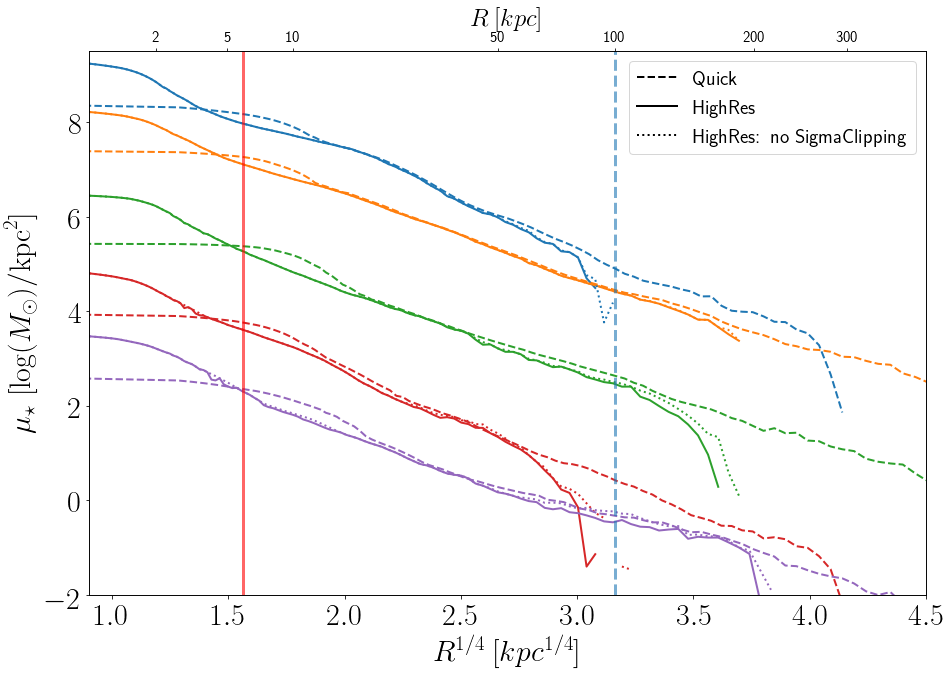

In [52]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

for n in range(N):
    
    iso_highres = random_isos_highres[n]
    iso_quick = random_isos_quick[n]
    iso_highres_diffSigClip = random_isos_highres_diffSigClip[n]
    
    

    p = ax1.plot((iso_highres['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, 
                 alpha=1, label='_nolegend_', zorder=1, linestyle='-')

    ax1.plot((iso_quick['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_quick['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle='--')
    ax1.plot((iso_highres_diffSigClip['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres_diffSigClip['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle=':')




# no show lines for legend
ax1.plot([], linewidth=2, alpha=1, linestyle='--', label='Quick', zorder=1, c='k') 
ax1.plot([], linewidth=2, alpha=1, label='HighRes', zorder=1, c='k') 
ax1.plot([], linewidth=2, alpha=1, linestyle=':', label='HighRes: no SigmaClipping', zorder=1, c='k') 


######################################################################################################################
# plot details
######################################################################################################################
# X-Y limits
ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(-2, 9.5)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

## try mean

In [53]:
def get_masses_highres(sim_file, sim_name, gal_n=0):

    # Load maps
    mass_map_cen, mass_map_cen_icl, pixel_scale, m_cat = get_mass_maps(sim_file, gal_n=gal_n)

    #postage mass
    m_post = np.log10(np.sum(mass_map_cen))
    m_post_icl = np.log10(np.sum(mass_map_cen_icl))


    #ouput maps
    maps_location='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/highres/'

    file_name=sim_name+'_'+str(gal_n)+'_xy'
    fits_prefix = maps_location + file_name
    save_to_fits(mass_map_cen, fits_prefix + '_cen.fits')
    # save_to_fits(img_cen_sat, fits_prefix + '_cen_sat.fits')
    # save_to_fits(img_cen_icl, fits_prefix + '_cen_icl.fits')
    # save_to_fits(img_all, fits_prefix + '_all.fits')

    data=mass_map_cen
    suffix='_cen'

    ###########################################################################
    #get ellipse information from iso file of quick
    iso_quick = load_pkl('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/TNG_%d_xy_cen_ellip_3.pkl'%i)
    q = 1- iso_quick['ell'][-1]
    theta = iso_quick['pa'][-1]* np.pi /180. 

    #central pixels
    x0=len(data)/2.
    y0=len(data)/2.

    a_10, a_30, a_100 = (10. / pixel_scale), (30. / pixel_scale), (100. / pixel_scale)
    b_10, b_30, b_100 =  a_10 * q, a_30 * q, a_100 * q



    # plot background-subtracted image
    m, s = np.mean(data), np.std(data)
    fig, ax = plt.subplots()
    im = ax.imshow(data, interpolation='nearest', cmap=plt.get_cmap('viridis'),
                   vmin=m-s, vmax=m+s, origin='lower')

    # plot an ellipse for each object
    e_30 = Ellipse(xy=(x0, y0),
                 width=a_30,
                 height=b_30,
                 angle=theta * 180. / np.pi)
    e_30.set_facecolor('none')
    e_30.set_edgecolor('red')
    ax.add_artist(e_30)

    e_100 = Ellipse(xy=(x0, y0),
                 width=a_100,
                 height=b_100,
                 angle=theta * 180. / np.pi)
    e_100.set_facecolor('none')
    e_100.set_edgecolor('red')
    ax.add_artist(e_100)


    plt.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/ellipses/highres/'+file_name)
    plt.clf()

    ###########################################################################
    #2D masses
    flux_10, fluxerr_10, flag_10 = sep.sum_ellipse(data, x0, y0,
                                                   a_10, b_10, theta)
    flux_30, fluxerr_30, flag_30 = sep.sum_ellipse(data, x0, y0,
                                                   a_30, b_30, theta)
    flux_100, fluxerr_100, flag_100 = sep.sum_ellipse(data, x0, y0,
                                                      a_100, b_100, theta)

    ###########################################################################
    #1D masses from galSBP
#     try:
    iso, iso_bin = galSBP.galSBP(maps_location+file_name+suffix+'.fits',
                                     galX=x0,
                                     galY=y0,
                                     galQ=q,
                                     galPA=theta* 180. / np.pi,
                                     maxSma=250,
                                     iniSma=50.0,
                                     stage=3,
                                     intMode='mean',
                                     ellipStep=0.05,
                                     pix=pixel_scale,
                                     zpPhoto=0.0,
                                     isophote=x_isophote,
                                     xttools=x_ttools,
                                     recenter=True,
                                     savePng=False,
                                     verbose=True,
                                     uppClip=3.0,
                                     lowClip=3.0,
                                     nClip=2)


    ###########################################################################
    iso['sma_kpc'] = iso['sma'] * pixel_scale
    iso['intens_kpc']=iso['intens'] / (pixel_scale**2)

    m_1d_10, m_1d_30, m_1d_100 = oneD_mass(iso, 10.), \
                                oneD_mass(iso, 30.), \
                                oneD_mass(iso, 100.)

    #integrated mass from extrapolation
    extrap_mass = extrapolated_1D_mass(iso, 800)

#     except:
#         iso,m_1d_10, m_1d_30, m_1d_100, extrap_mass  = -99.99, -99.99, -99.99, -99.99, -99.99


    m_2d_10, m_2d_30, m_2d_100 = np.log10(flux_10), \
                                np.log10(flux_30), \
                                np.log10(flux_100)


    masses = [m_cat, m_post, m_post_icl, m_1d_10, m_1d_30, m_1d_100, m_2d_10,
            m_2d_30, m_2d_100, extrap_mass]

    return iso, masses


In [ ]:
random_isos_highres_diffSigClip = [] #compare to isos with different elipticity

for i in random_indices:
        
        iso_highres_diffSigClip, _ = get_masses_highres(tng_highres_file, 'TNG_highres',
                                                        gal_n=i)
    
        random_isos_highres_diffSigClip.append(iso_highres_diffSigClip)

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


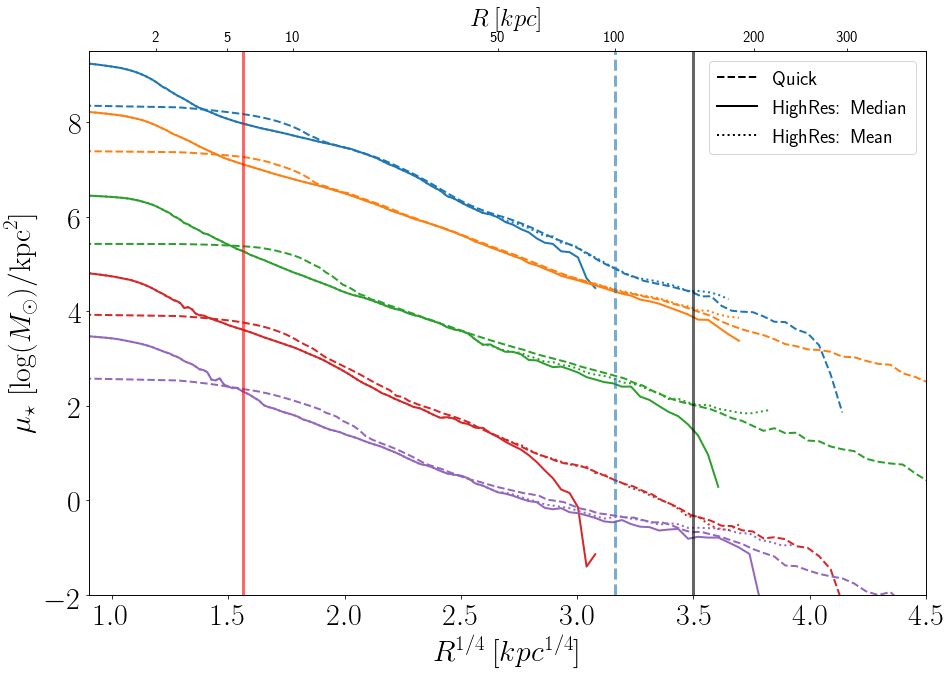

In [57]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

for n in range(N):
    
    iso_highres = random_isos_highres[n]
    iso_quick = random_isos_quick[n]
    iso_highres_diffSigClip = random_isos_highres_diffSigClip[n]
    
    

    p = ax1.plot((iso_highres['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, 
                 alpha=1, label='_nolegend_', zorder=1, linestyle='-')

    ax1.plot((iso_quick['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_quick['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle='--')
    ax1.plot((iso_highres_diffSigClip['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres_diffSigClip['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle=':')




# no show lines for legend
ax1.plot([], linewidth=2, alpha=1, linestyle='--', label='Quick', zorder=1, c='k') 
ax1.plot([], linewidth=2, alpha=1, label='HighRes: Median', zorder=1, c='k') 
ax1.plot([], linewidth=2, alpha=1, linestyle=':', label='HighRes: Mean', zorder=1, c='k') 


######################################################################################################################
# plot details
######################################################################################################################
# X-Y limits
ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(-2, 9.5)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(150.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='k')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

# go back and check if cut-off at high R disappears in larger maps too

In [12]:
isos_median=[]
isos_mean=[]

for i in random_indices:
    iso_med, _ = get_masses(tng_quick_file, 'TNG_quick', gal_n=i, intMode='median')
    iso_mean, _ = get_masses(tng_quick_file, 'TNG_quick', gal_n=i, intMode='mean')
    
    isos_median.append(iso_med)
    isos_mean.append(iso_mean)

----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/TNG_quick_172_xy_cen.fits
###      Input Image   : temp_9UMMO.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick_800/TNG_quick

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
###     Input background value   :  0.0
###     1-D SBP background value :  13976.68
###     Current outer background :  13976.68
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


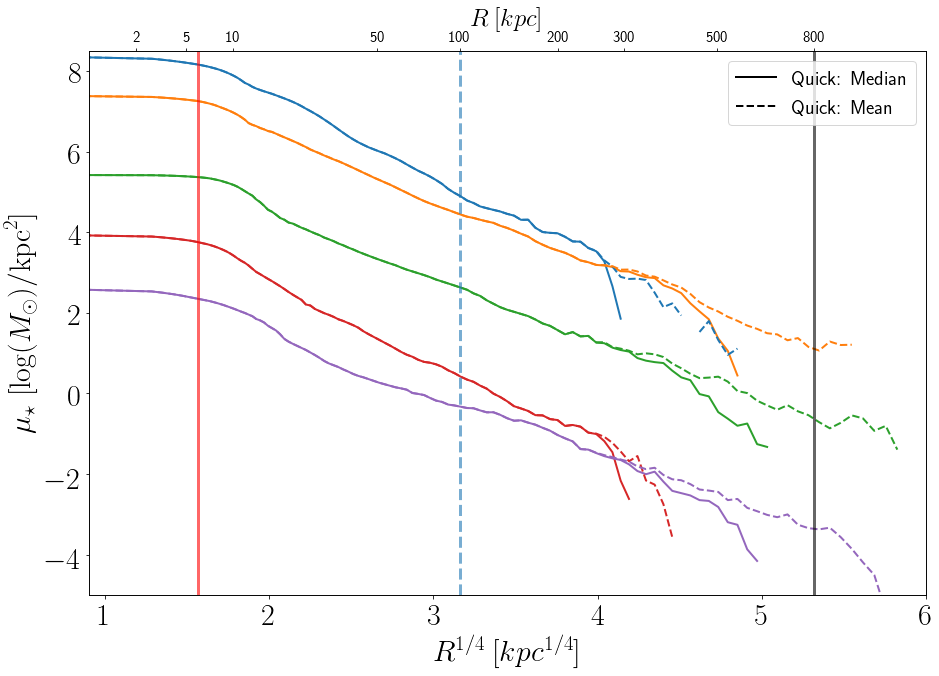

In [17]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

for n in range(N):
    
    iso_median = isos_median[n]
    iso_mean = isos_mean[n]

    

    p = ax1.plot((iso_median['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_median['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, 
                 alpha=1, label='_nolegend_', zorder=1, linestyle='-')

    ax1.plot((iso_mean['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_mean['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle='--')



# no show lines for legend
ax1.plot([], linewidth=2, alpha=1, label='Quick: Median', zorder=1, c='k') 
ax1.plot([], linewidth=2, alpha=1, linestyle='--', label='Quick: Mean', zorder=1, c='k') 



######################################################################################################################
# plot details
######################################################################################################################
# X-Y limits
ax1.set_xlim(0.9, 6)
ax1.set_ylim(-5, 8.5)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='k')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

# merge highres with quick

In [41]:
from astropy.table import vstack

In [5]:
tng_isos_quick[0]


sma,intens,int_err,pix_var,rms,ell,ell_err,pa,pa_err,x0,x0_err,y0,y0_err,grad,grad_err,grad_r_err,rsma,mag,mag_lerr,mag_uerr,tflux_e,tflux_c,tmag_e,tmag_c,npix_e,npix_c,a3,a3_err,b3,b3_err,a4,a4_err,b4,b4_err,ndata,nflag,niter,stop,a_big,sarea,a1,a1_err,b1,b1_err,a2,a2_err,b2,b2_err,pa_norm,sbp_ori,sbp_sub,sbp,intens_sub,intens_bkg,sbp_err,sbp_low,sbp_upp,sma_asec,rsma_asec,growth_ori,growth_sub,avg_x0,avg_y0,avg_q,avg_pa,avg_bkg,intens_cor,sbp_cor,growth_cor,rad_outer,mag_tot,mag_tot_ori,mag_tot_sub,sma_kpc,intens_kpc
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,129035600000.0,nan,nan,nan,nan,nan,nan,nan,151.0,nan,150.0,nan,-51648290000.0,nan,nan,0.0,-27.77677,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-24.141780224256458,-24.141780224256458,-24.141780224256458,129035600000.0,0.0,nan,nan,nan,0.0,0.0,0.0,0.0,151.0,150.0,0.61,-56.74999999999999,1357828.0,129034242172.0,-24.14176879910886,0.0,56.316692613381,-31.02849813965512,-31.033405566939916,-31.033405566939916,0.0,4536407812.5
0.5095395,102718700000.0,4904136000.0,25006290000.0,17682110000.0,0.39,0.09398585,-56.75,8.857731,151.0,0.03552463,150.0,0.02984591,-49114910000.0,142796800000.0,2.907402,0.8448789,-27.52912,0.05311426,0.05063792,129035600000.0,129035600000.0,-27.77677,-27.77677,1.0,1.0,0.1279726,0.3760068,-0.06377599,0.192678,-0.08435982,0.245875,-0.1384156,0.4027726,13,0,1.0,0.0,nan,2.0,-50614604.0,415484896.0,340939520.0,401758848.0,-99122448.0,400993728.0,319054720.0,387464672.0,-56.75,-23.894130146223333,-23.894130146223333,-23.894130146223333,102718700000.0,0.0,0.0506372942924358,-23.94476744051577,-23.843492851930897,2.717544,1.2839382764460703,0.0,0.0,151.0,150.0,0.61,-56.74999999999999,1357828.0,102717342172.0,-23.894115793892517,0.0,56.316692613381,-31.02849813965512,-31.033405566939916,-31.033405566939916,2.717544,3611204296.875
0.5350164,101464400000.0,5140003000.0,26208970000.0,18532540000.0,0.39,0.09436253,-56.75,8.893232,151.0,0.03745036,150.0,0.03146381,-48871820000.0,142524400000.0,2.916291,0.8552474,-27.51579,0.05644403,0.05365307,129035600000.0,129035600000.0,-27.77677,-27.77677,1.0,1.0,0.1295712,0.3817271,-0.06470075,0.1957861,-0.08380895,0.2450272,-0.1380902,0.4030575,13,0,1.0,0.0,nan,2.0,-52952608.0,436397728.0,358750144.0,421980832.0,-103662488.0,421127840.0,335826144.0,406919456.0,-56.75,-23.88079058920392,-23.88079058920392,-23.88079058920392,101464400000.0,0.0,0.05365362709805055,-23.93444421630197,-23.827136962105868,2.8534207999999994,1.2996950224183725,5174539042.955697,5174539042.955697,151.0,150.0,0.61,-56.74999999999999,1357828.0,101463042172.0,-23.880776059448813,5174469795.67291,56.316692613381,-31.02849813965512,-31.033405566939916,-31.033405566939916,2.8534207999999994,3567107812.5
0.5617672,100154000000.0,5386708000.0,27466930000.0,19422050000.0,0.39,0.09475665,-56.75,8.930374,151.0,0.03948711,150.0,0.03317498,-48624350000.0,142240400000.0,2.925291,0.8657432,-27.50167,0.06002428,0.05687949,129035600000.0,129035600000.0,-27.77677,-27.77677,1.0,1.0,0.1312291,0.3876632,-0.06568277,0.1990813,-0.0831956,0.243997,-0.1377489,0.4033059,13,0,1.0,0.0,nan,2.0,-55398828.0,458454944.0,377601280.0,443309344.0,-108408880.0,442358240.0,353588928.0,427433600.0,-56.75,-23.866677107928297,-23.866677107928297,-23.866677107928297,100154000000.0,0.0,0.056879260474815396,-23.923556368403112,-23.80979784745348,2.9960917333333335,1.315

In [ ]:
tng_isos_quick = open_pkl(tng_isos_file_quick)
tng_isos_highres = open_pkl(tng_isos_file_highres)

In [28]:
random_isos_highres = []
random_isos_quick = []

for i in random_indices:
    
        iso_quick = tng_isos_quick[i]
        iso_highres = tng_isos_highres[i]
        
        random_isos_quick.append(iso_quick)
        random_isos_highres.append(iso_highres)

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


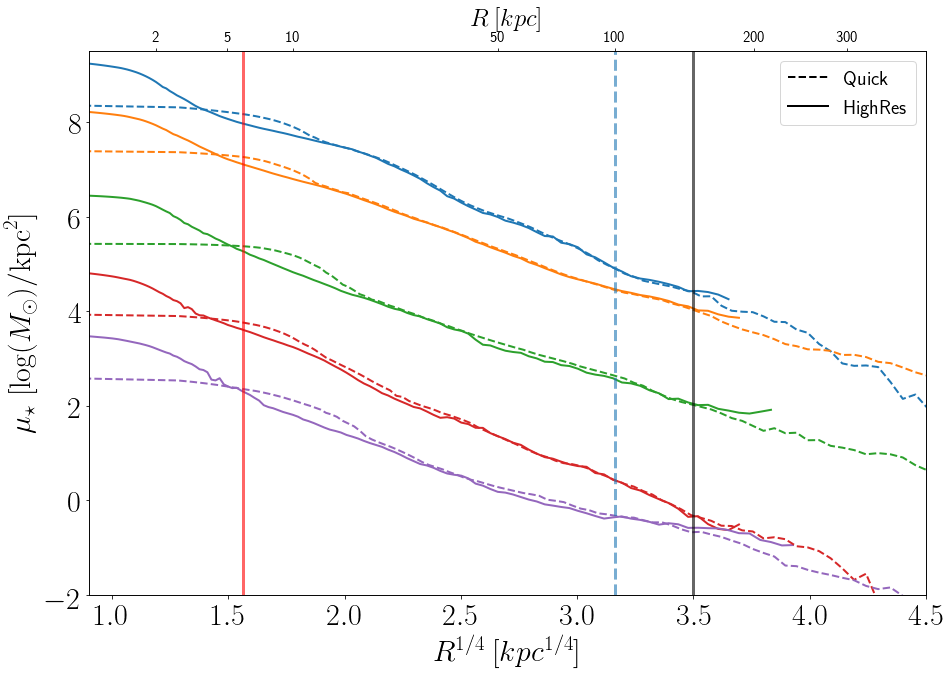

In [29]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

for n in range(N):
    
    iso_highres = random_isos_highres[n]
    iso_quick = random_isos_quick[n]
    
    

    p = ax1.plot((iso_highres['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, 
                 alpha=1, label='_nolegend_', zorder=1, linestyle='-')

    ax1.plot((iso_quick['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_quick['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle='--')
    


# no show lines for legend
ax1.plot([], linewidth=2, alpha=1, linestyle='--', label='Quick', zorder=1, c='k') 
ax1.plot([], linewidth=2, alpha=1, label='HighRes', zorder=1, c='k') 

######################################################################################################################
# plot details
######################################################################################################################
# X-Y limits
ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(-2, 9.5)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(150.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='k')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

### join at 100 kpc

In [43]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def merge_iso(iso_highres,iso_quick, merge_location):
    id_highres=find_nearest(iso_highres['sma_kpc'],merge_location)-1
    id_quick=find_nearest(iso_quick['sma_kpc'],merge_location)+1
    
    highres_half = iso_highres[:id_highres]
    quick_half = iso_quick[id_quick:]
    
    return vstack([highres_half,quick_half])
    

In [53]:
merged_isos=np.array([merge_iso(tng_isos_highres[i],tng_isos_quick[i], 100) for i in range(len(tng_isos_quick))])
np.save('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/tng_merged_isos_mean.npy', merged_isos)

/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


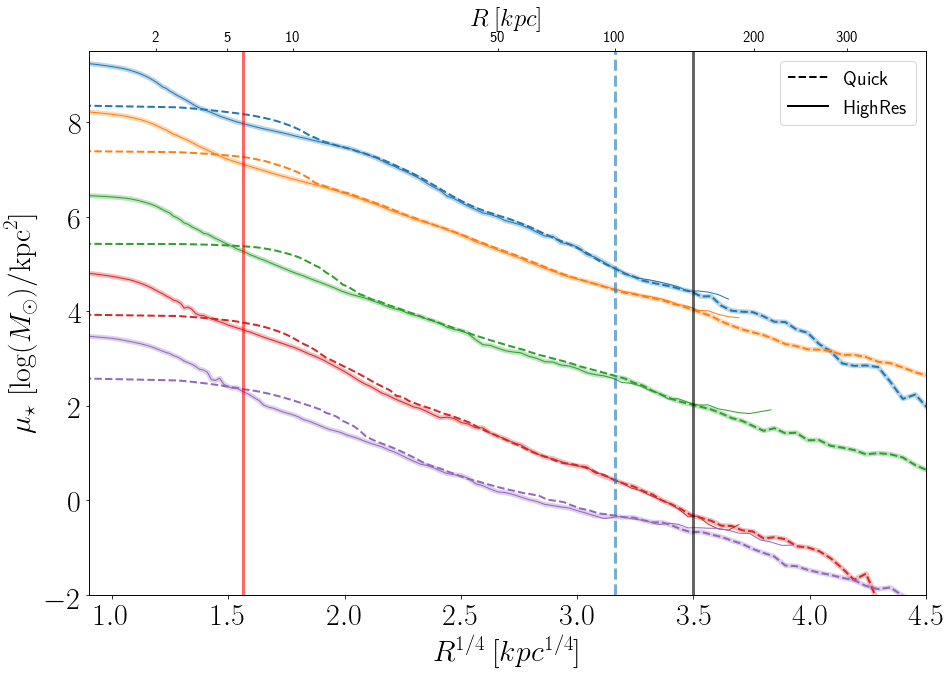

In [50]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

for n in range(N):
    
    iso_highres = random_isos_highres[n]
    iso_quick = random_isos_quick[n]
    
    merged_iso = merge_iso(iso_highres,iso_quick, 100)
    

    p = ax1.plot((iso_highres['sma'] * pixel_scale_highres) ** 0.25,
         np.log10(iso_highres['intens'] / (pixel_scale_highres**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=1, 
                 alpha=1, label='_nolegend_', zorder=2, linestyle='-')

    ax1.plot((iso_quick['sma'] * pixel_scale_quick) ** 0.25,
         np.log10(iso_quick['intens'] / (pixel_scale_quick**2.0))+ np.log10(0.7 ** 2.0) - (n*1.5) , linewidth=2, alpha=1, 
             label='_nolegend_', zorder=2, c=p[0].get_color(), linestyle='--')
    
    ax1.plot((merged_iso['sma_kpc']) ** 0.25,
         np.log10(merged_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) - (n*1.5), linewidth=5, alpha=0.3, 
             label='_nolegend_', zorder=1, c=p[0].get_color(), linestyle='-')

# no show lines for legend
ax1.plot([], linewidth=2, alpha=1, linestyle='--', label='Quick', zorder=1, c='k') 
ax1.plot([], linewidth=2, alpha=1, label='HighRes', zorder=1, c='k') 

######################################################################################################################
# plot details
######################################################################################################################
# X-Y limits
ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(-2, 9.5)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(150.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='k')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()